In [24]:
df = pd.read_parquet('yelp.parquet')
df

,stars,userid,reviewid,businessid,cat109,cat363,cat361,cat366,cat344,cat33,...,wend2,wend3,wend4,wend5,ureviewcnt,ustars,vuseful,vfunny,vcool,gender
0,5,-869100229,-1968915953,769523113,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,1,1,4,7,4.43,-331964951,-1823081949,-397064898,71845068
1,4,-869100229,143981813,-758096042,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,8,5,6,7,4.43,-331964951,-1823081949,-397064898,71845068
2,5,1261659565,538444307,1251550888,696087777,1988124248,1988124248,1988124248,696087777,1988124248,...,2,8,5,8,20,3.65,1879002950,1023896466,1079293707,71845068
3,4,330231284,1103275504,399921110,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,8,8,0,0,26,3.77,-359179259,-132918897,-331964951,530981620
4,3,504685766,-795436919,-1717839059,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,0,1,4,9,3.78,-1823081949,933211791,-559580957,530981620
5,4,624903643,-1959660769,-1688746024,1988124248,1988124248,1988124248,1988124248,1988124248,1988124248,...,1,2,1,1,65,4.17,-1376147523,-441499547,-319098976,530981620
6,5,1946436256,2102109306,1910454801,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,1,1,0,0,25,3.68,-1355542311,-559580957,-1823081949,71845068
7,2,465367280,623569907,-29994927,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,2,8,4,5,12,3.64,-132918897,-397064898,933211791,530981620
8,1,690927567,-1983709005,486955384,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,0,4,1,1,16,4.25,-441499547,-559580957,-1823081949,71845068
9,4,-1412727765,794373177,278962337,696087777,1988124248,1988124248,1988124248,1988124248,1988124248,...,6,8,6,12,24,3.29,-2018404295,-622913472,-1223696181,530981620


In [25]:
from sklearn.model_selection import train_test_split

X = df[df.columns[df.columns != 'stars']]
y = df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [26]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(num_leaves=6, min_data_in_leaf=4, max_depth=6)
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=4,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=6,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [27]:
fts = zip(X_train.columns, clf.feature_importances_)
sorted(fts, key=lambda x:x[1], reverse=True)

[('bstars', 735),
 ('ustars', 606),
 ('ureviewcnt', 303),
 ('breviewcnt', 110),
 ('reviewid', 71),
 ('latitude', 56),
 ('businessid', 53),
 ('vuseful', 53),
 ('longitude', 51),
 ('userid', 48),
 ('vfunny', 46),
 ('cat109', 35),
 ('vcool', 35),
 ('cat366', 31),
 ('wday5', 30),
 ('wend3', 24),
 ('city', 23),
 ('cat221', 21),
 ('wday3', 18),
 ('wday4', 16),
 ('wend1', 16),
 ('wday2', 14),
 ('cat444', 13),
 ('cat361', 11),
 ('cat344', 10),
 ('cat79', 10),
 ('wday1', 10),
 ('cat314', 9),
 ('wend2', 7),
 ('wend5', 7),
 ('cat501', 5),
 ('cat404', 5),
 ('cat246', 5),
 ('wend4', 4),
 ('cat33', 3),
 ('cat259', 3),
 ('open', 2),
 ('cat363', 1),
 ('cat104', 0),
 ('state', 0),
 ('gender', 0)]

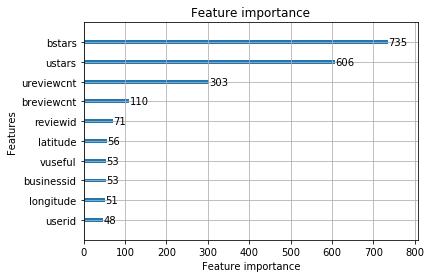

In [28]:
lgb.plot_importance(clf, max_num_features=10)

In [29]:
from sklearn.metrics import mean_squared_error  

pred = clf.predict(X_test)
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.140004


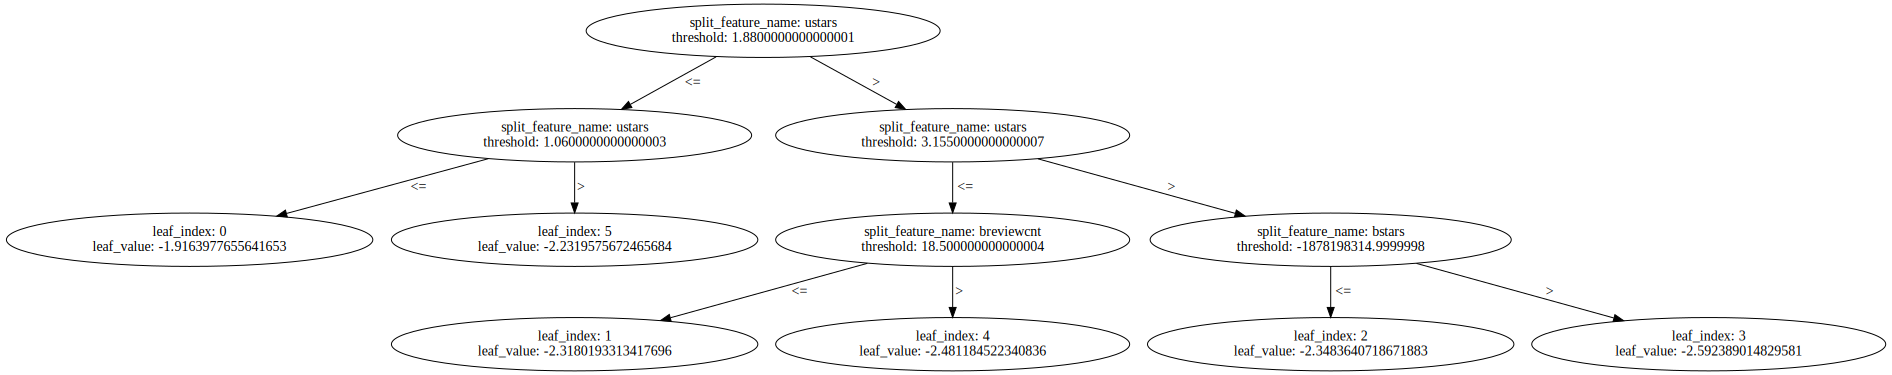

In [30]:
lgb.create_tree_digraph(clf)

In [31]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    clf,
    X_train,
    y_train,
    target_name='stars',
    feature_names=X.columns,
    class_names=['1', '2', '3', '4', '5'])
                                                                                                                                            
viz.view()

AttributeError: 'LGBMClassifier' object has no attribute 'tree_'